In [86]:
import numpy as np
import pandas as pd
import openml

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [87]:
classifiers = {
    'KNeighborsClassifier': (KNeighborsClassifier, {'n_neighbors': [1,2,3,4,5]}),
    'GaussianNB': (GaussianNB, {'var_smoothing': [1e-9, 1e-5, 1e-1]}),
    'LogisticRegression': (LogisticRegression, {'C': [0.1, 0.5, 1.0, 2.0, 5.0]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier, {'max_depth': [1, 3, 5, 8, 10]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier, {'n_estimators': [1, 3, 5, 8, 10]}),
    'RandomForestClassifier': (RandomForestClassifier, {'n_estimators': [1, 3, 5, 8, 10]}),
    'MLPClassifier': (MLPClassifier, {'alpha': [1e-5, 1e-3, 0.1, 10]})
}

In [88]:
datasets = {
    'steel-plates-fault': openml.datasets.get_dataset(1504).get_data()[0],
    'ionosphere': openml.datasets.get_dataset(59).get_data()[0],
    'banknote-authentication': openml.datasets.get_dataset(1462).get_data()[0]
}

/var/folders/gp/y632yr6n6fx67frq5kjq73d00000gn/T/ipykernel_54849/3213322175.py:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  'steel-plates-fault': openml.datasets.get_dataset(1504).get_data()[0],
/var/folders/gp/y632yr6n6fx67frq5kjq73d00000gn/T/ipykernel_54849/3213322175.py:3: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  'ionosphere': openml.datasets.get_dat

In [89]:
results = {}

for dataset_name, data in datasets.items():
    X = data.iloc[:, :-1]  # Select all columns except the last as features
    y = data.iloc[:, -1]   # Select the last column as the target
    results[dataset_name] = {}

    for clf_name, (clf_class, param_grid) in classifiers.items():
        results[dataset_name][clf_name] = []
        
        for param, values in param_grid.items():
            for value in values:
                accuracies = []

                for i in range(50):
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)
                    clf = clf_class()
                    clf.set_params(**{param: value})
                    clf.fit(X_train, y_train)
                    y_pred = clf.predict(X_test)
                    accuracies.append(accuracy_score(y_test, y_pred))
                
                results[dataset_name][clf_name].append((param, value, accuracies))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

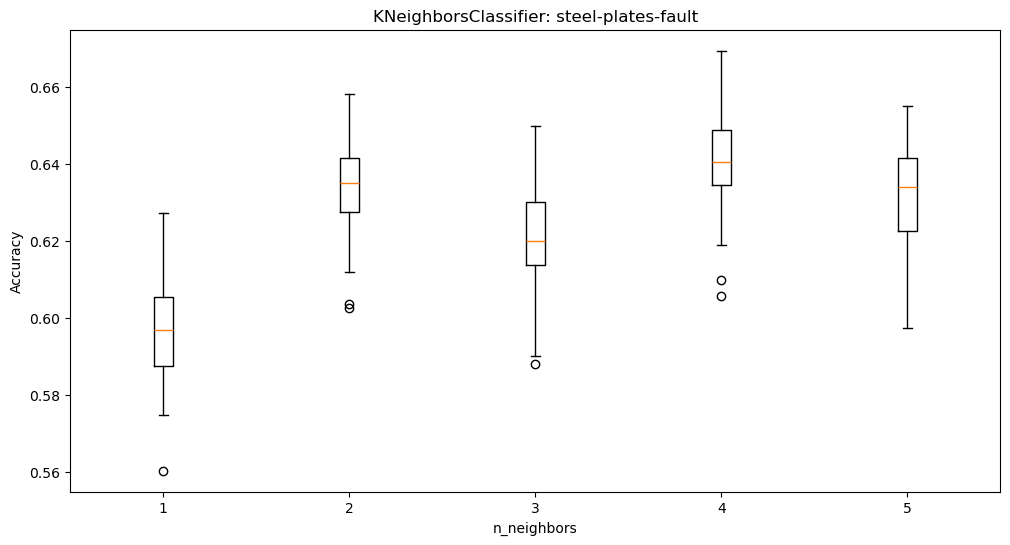

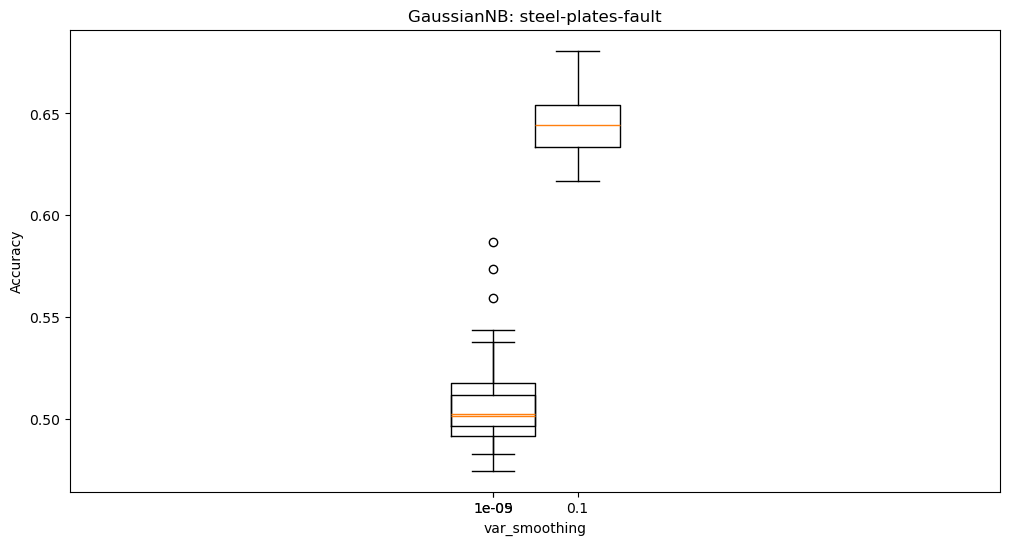

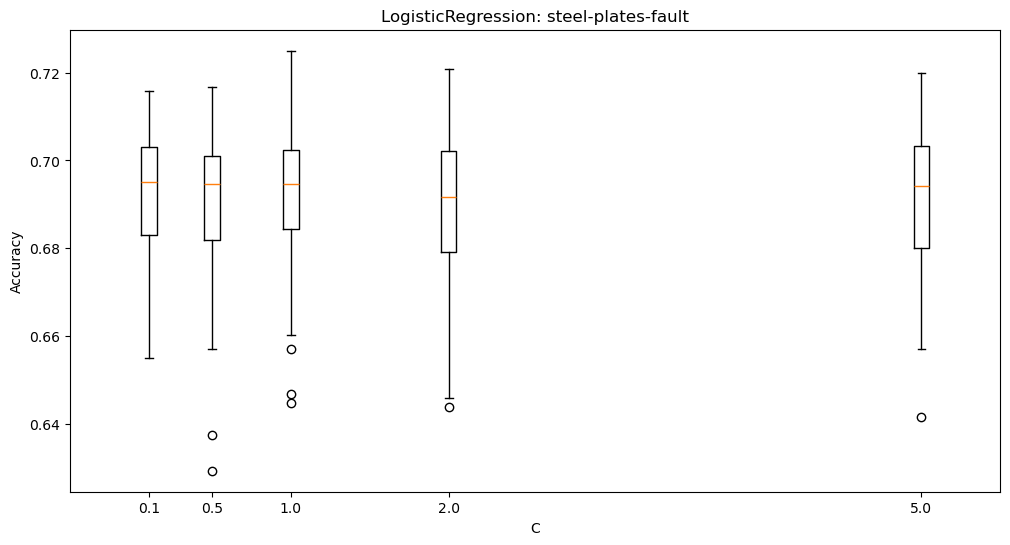

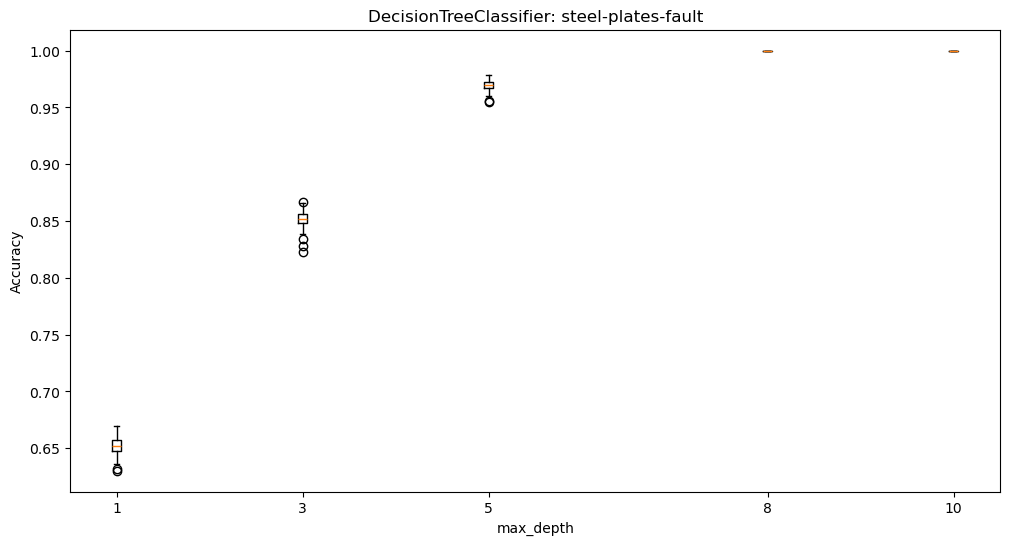

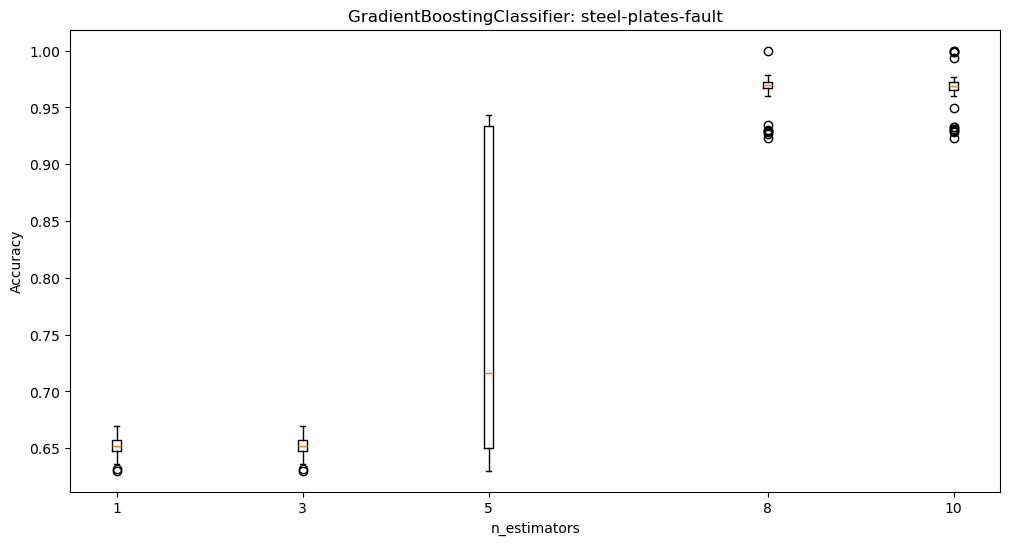

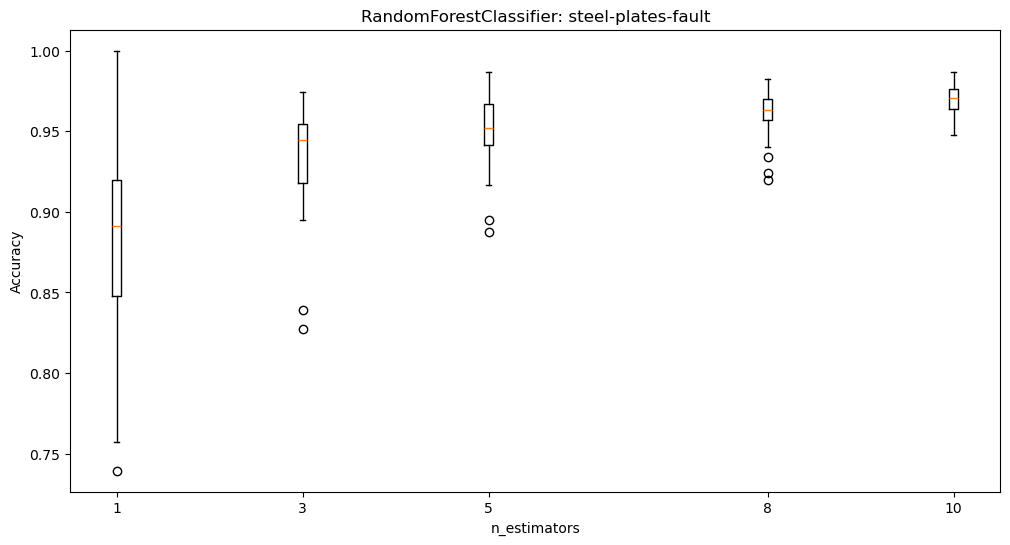

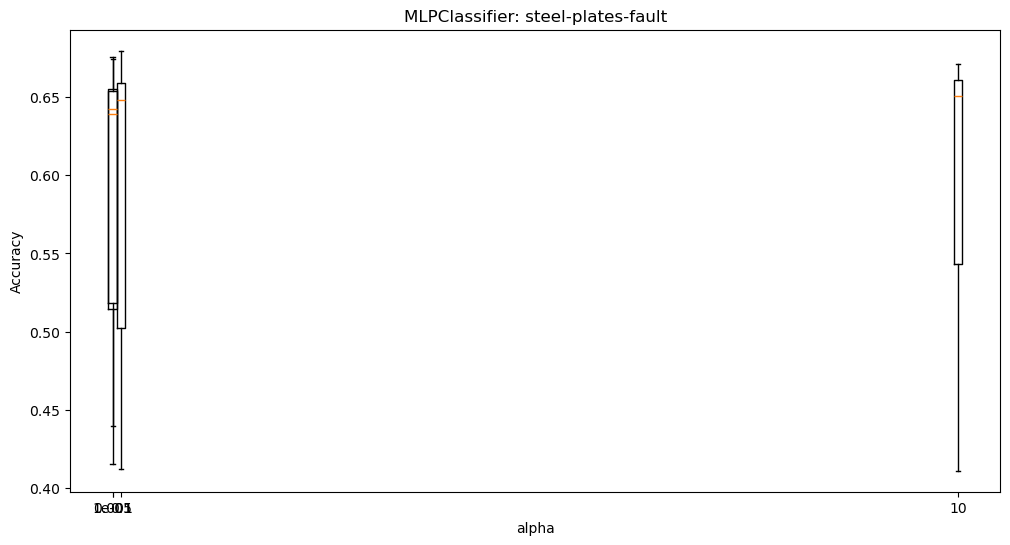

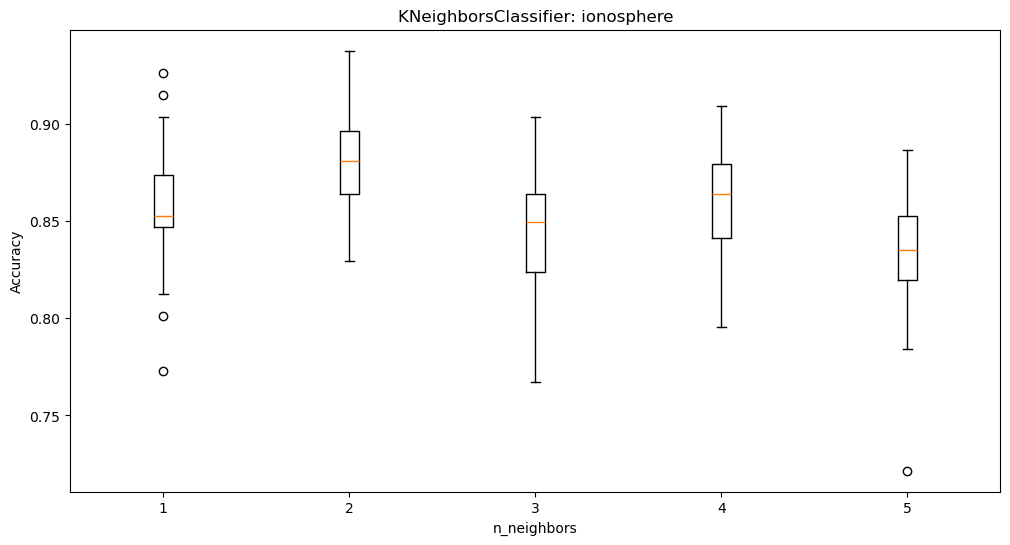

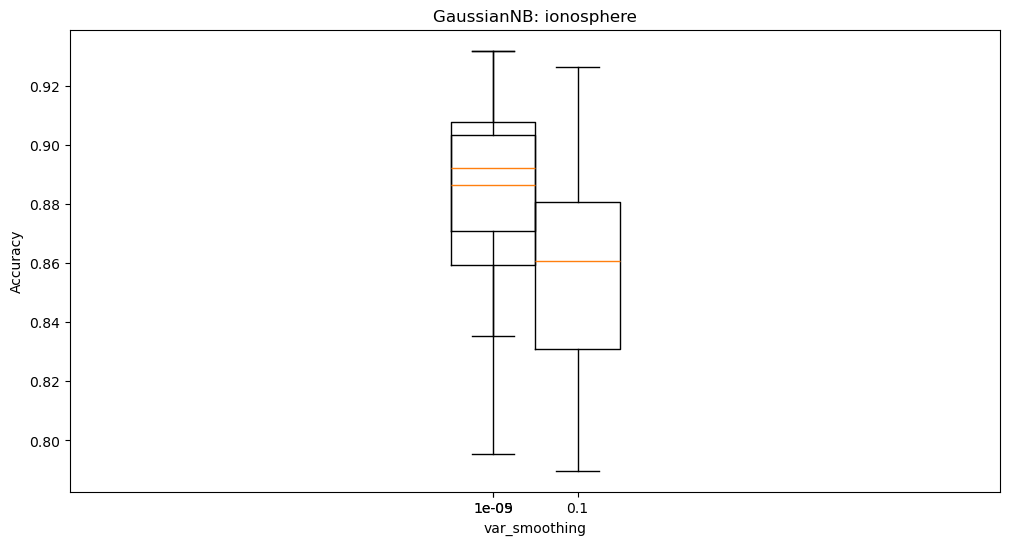

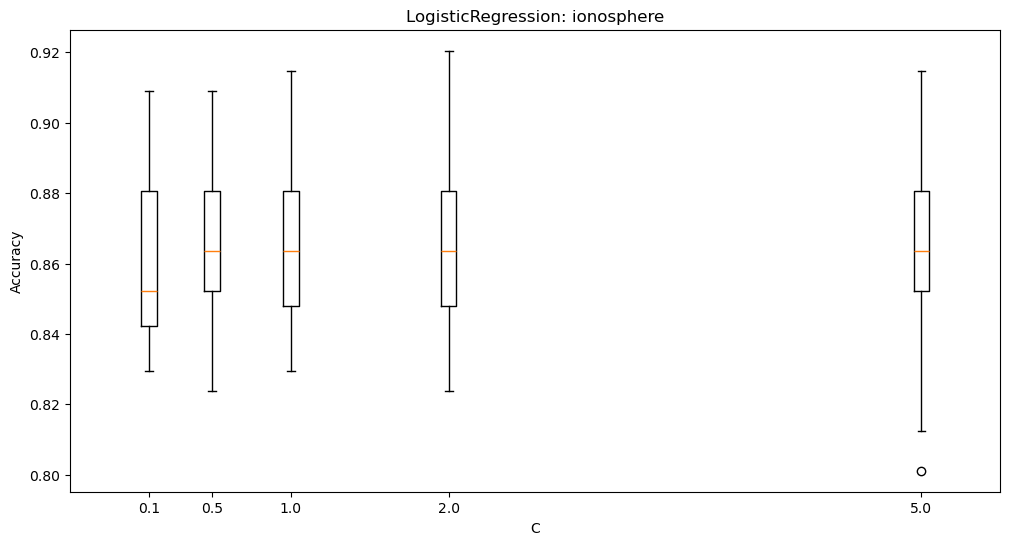

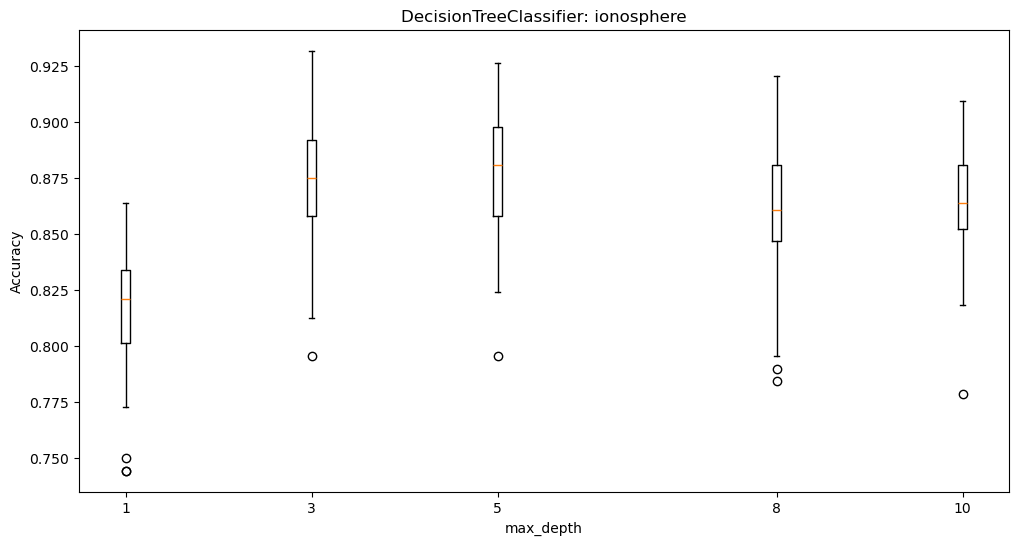

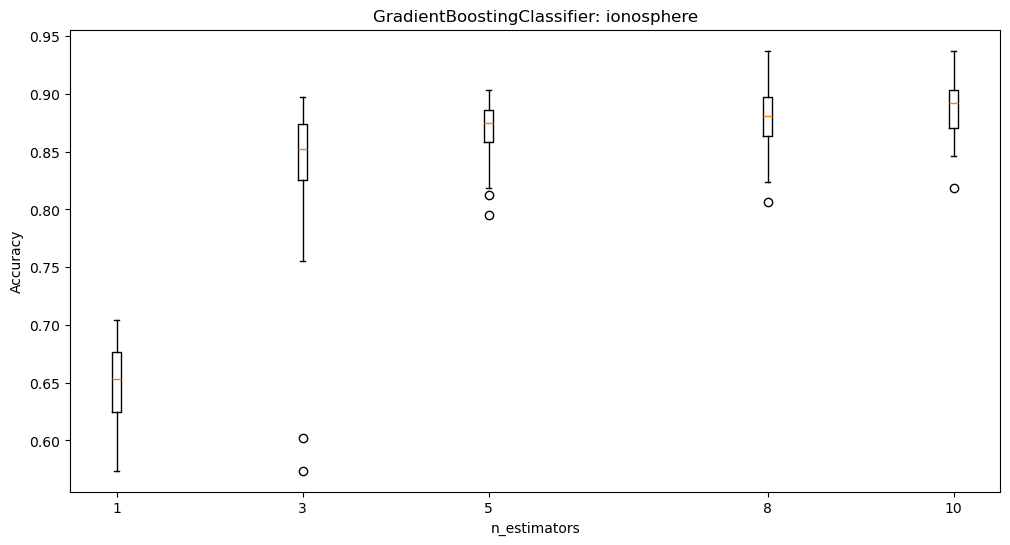

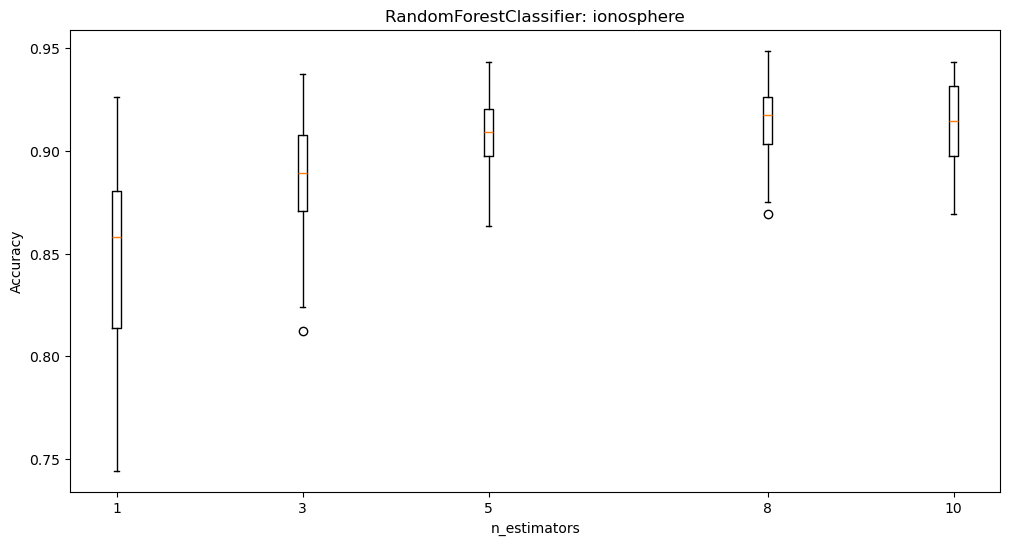

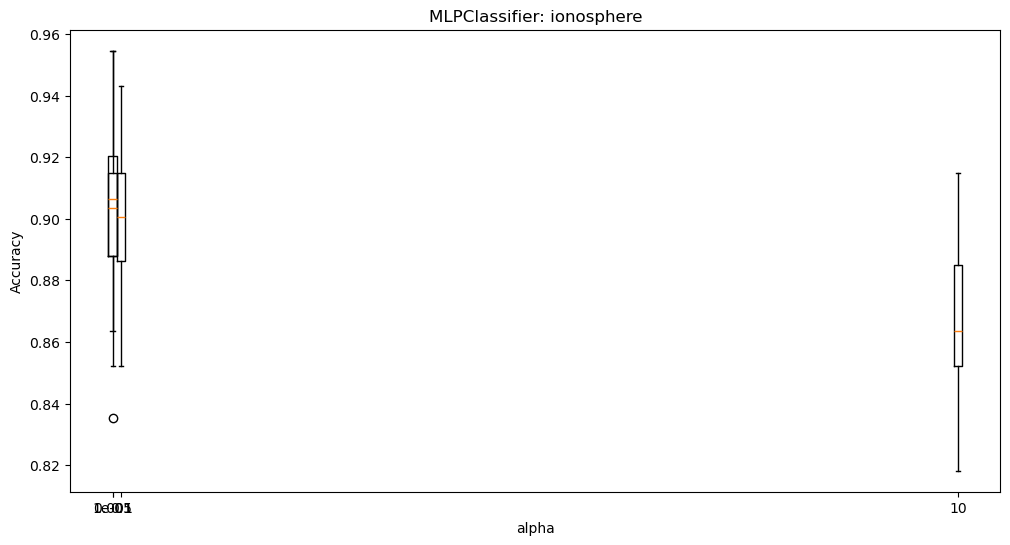

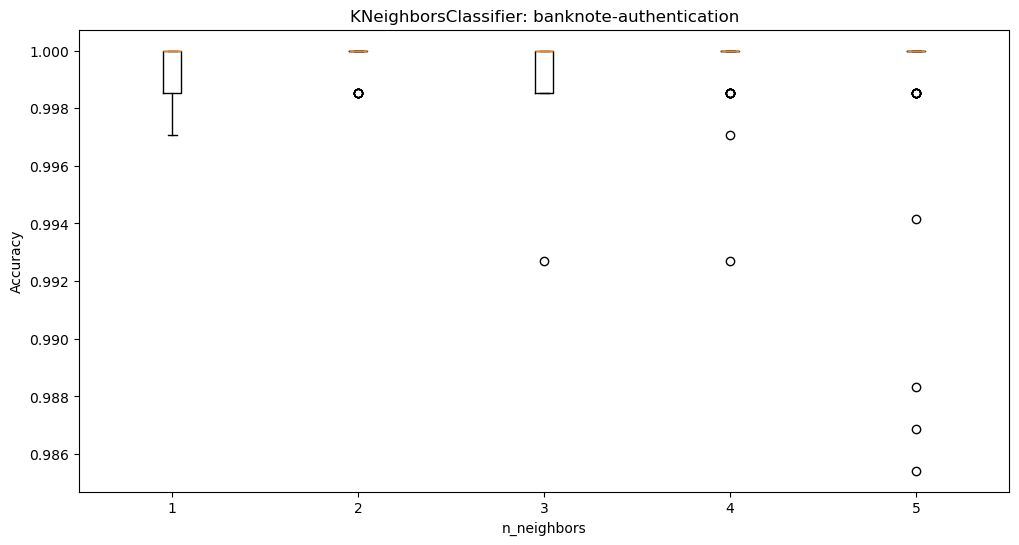

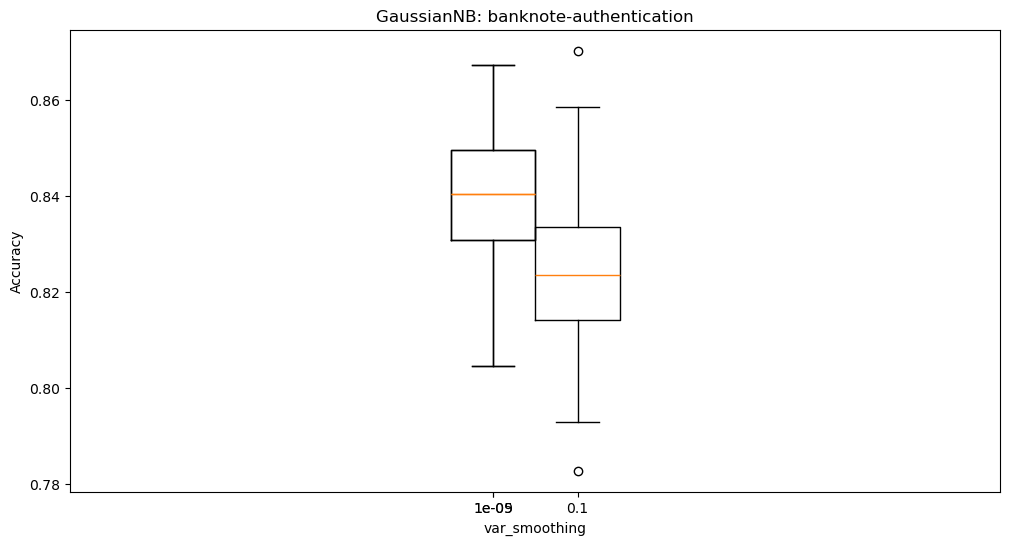

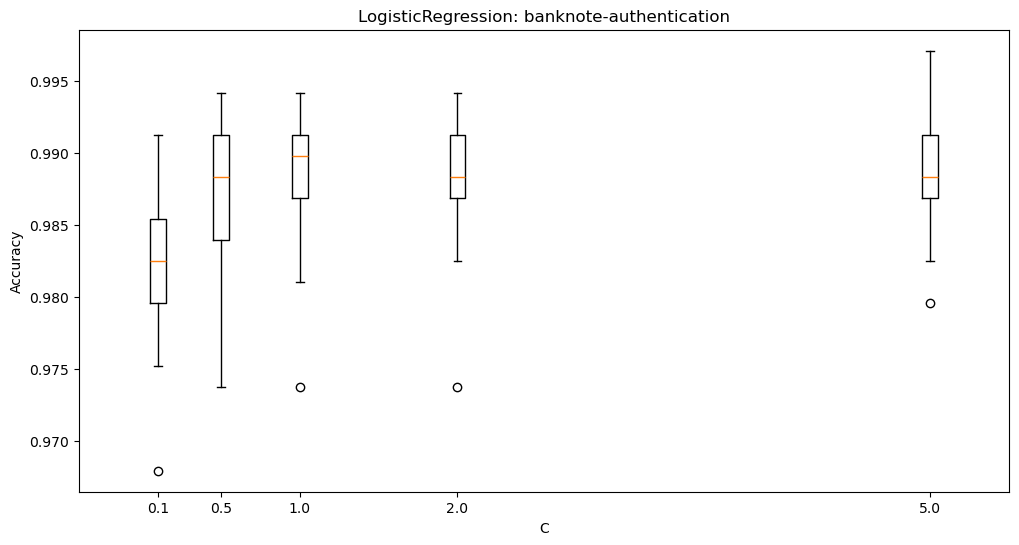

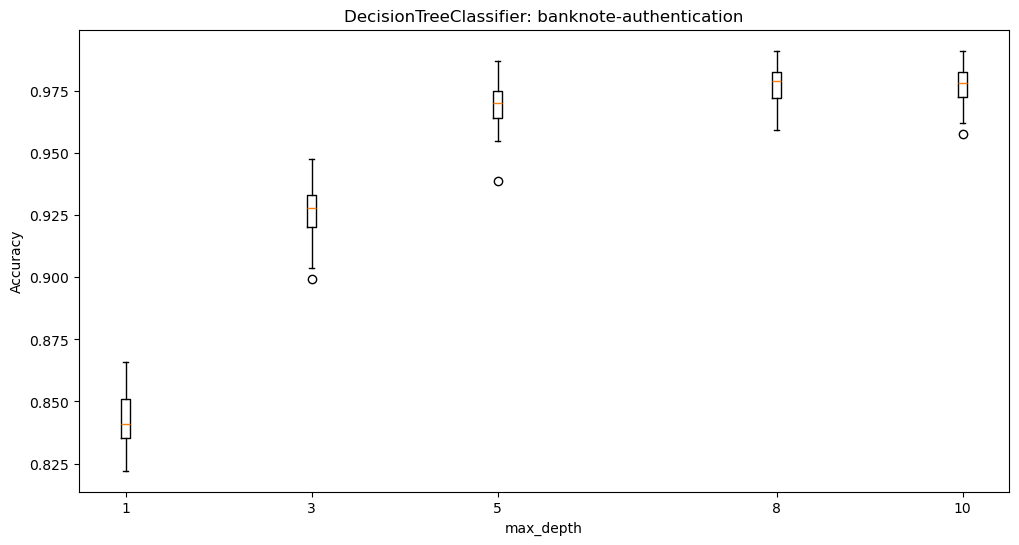

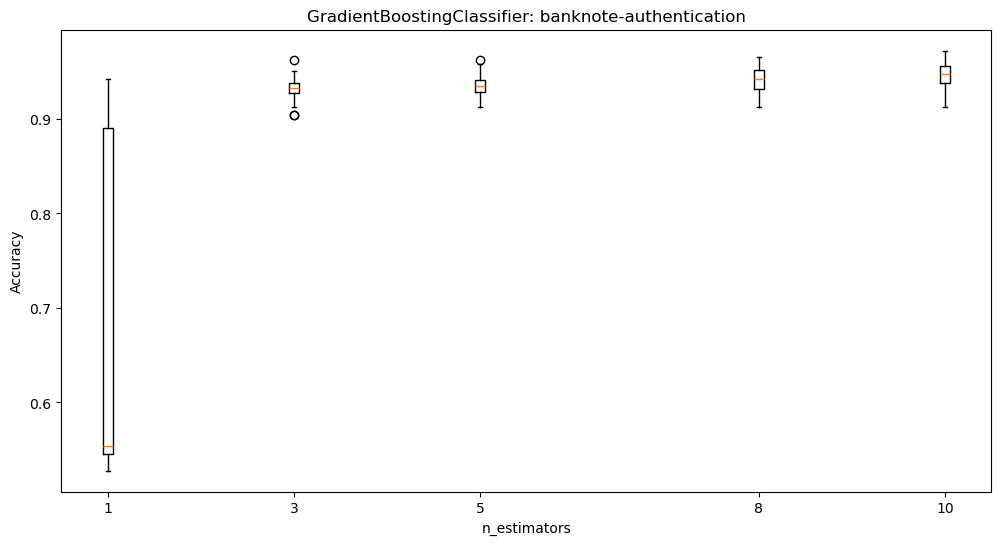

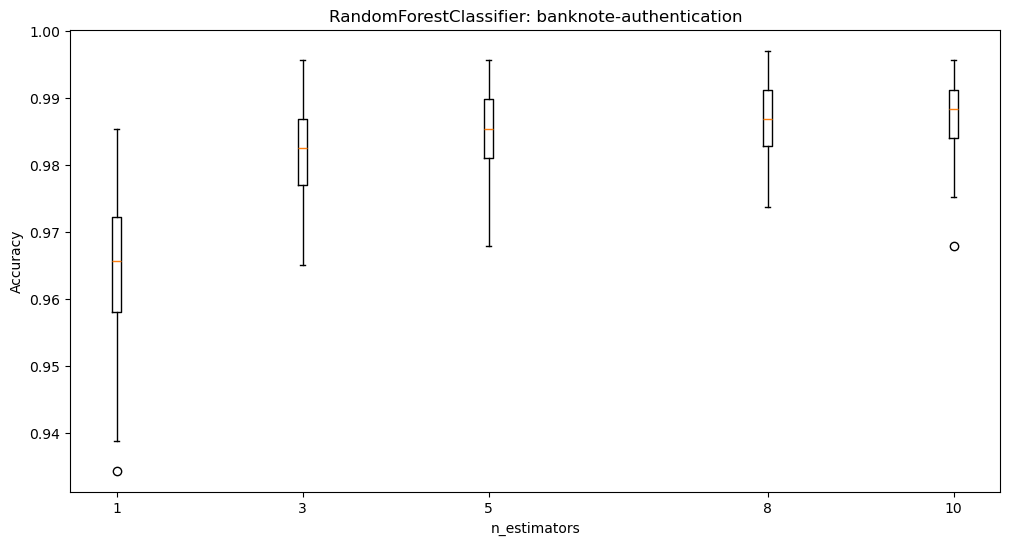

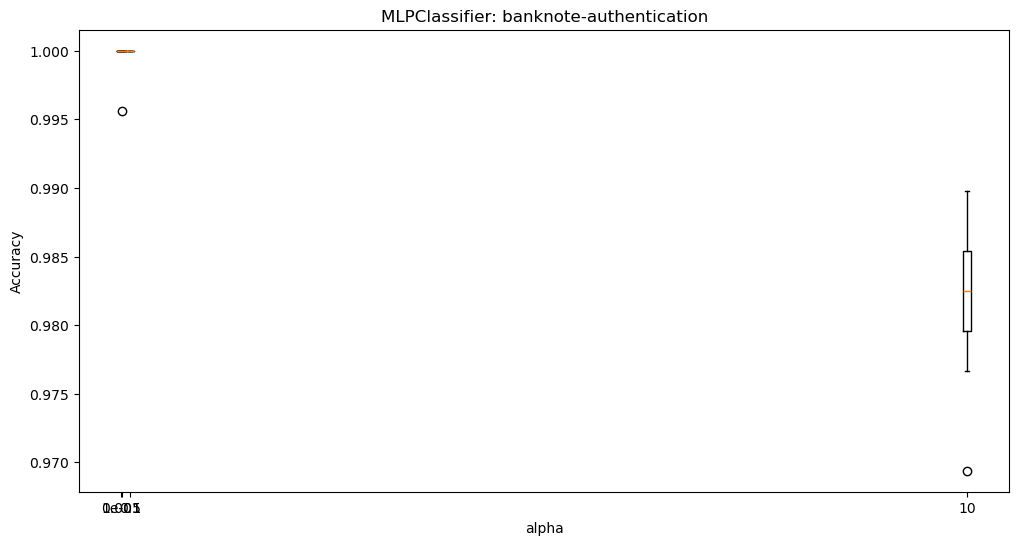

In [96]:
for dataset_name in results:
    for clf_name in results[dataset_name]:
        plt.figure(figsize=(12, 6))
        for param, value, accuracies in results[dataset_name][clf_name]:
            plt.boxplot(accuracies, positions=[value], widths=0.1)
        plt.title(f'{clf_name}: {dataset_name}')
        plt.xlabel(f'{param}')
        plt.ylabel('Accuracy')
        # plt.grid(True)
        plt.show()